# Identify dog breeds (also for stray dogs) from picture

Upload picture of dog. Return proba of breed

## Dataset: Stanford Dogs

The Stanford Dogs dataset contains images of **120 breeds of dogs** from around the world. This dataset has been built using images and annotation *from ImageNet* for the task of fine-grained image categorization. There are **20,580 images**, out of which 12,000 are used for training and 8580 for testing. **Class labels** and bounding box annotations **are provided** for all the 12,000 images.

[Documentation](https://www.tensorflow.org/datasets/catalog/stanford_dogs)

Install `tensorflow-datasets` package

In [1]:
# !pip install -quiet tensorflow-datasets

Catalog of available datasets

In [2]:
import tensorflow_datasets as tfds

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

### Data loading

Import the `stanford_dogs` dataset

In [3]:
# the first time it will take a while
data, info = tfds.load('stanford_dogs', as_supervised=True, with_info=True)

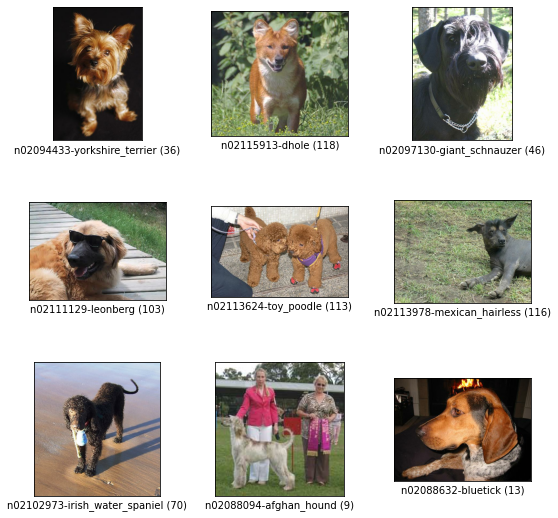

In [4]:
tfds.show_examples(data['train'], info);

We might want to use the provided bounding boxes to crop the images to capture only the dog.

### Data exploration

In [5]:
data_train_numpy = tfds.as_numpy(data['train'])
data_test_numpy = tfds.as_numpy(data['test'])

Each row is an observation (i.e. an image of a dog), structured as tuple.
The first element is the NumPy array including image data, the second element is the associated class (i.e. dog breed)

In [6]:
for example in data_train_numpy:
    print(example)
    break

(array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [19, 17, 20],
        [19, 17, 20],
        [19, 17, 20]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [19, 17, 20],
        [19, 17, 20],
        [19, 17, 20]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [19, 17, 20],
        [19, 17, 20],
        [19, 17, 20]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [23, 21, 22],
        [24, 22, 23],
        [24, 22, 23]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [22, 20, 21],
        [22, 20, 21],
        [23, 21, 22]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [21, 19, 20],
        [21, 19, 20],
        [22, 20, 21]]], dtype=uint8), 36)


In [7]:
# checking the number of observation in the train set
i = 0

for example in data_train_numpy:
    i +=1
    
print(i)

12000


In [8]:
print(info.features["label"].num_classes) # returns total number of classes (i.e. breeds)
# print(info.features["label"].names) # list of all label names
print(info.features["label"].int2str(7)) # method that given a class label as int, returns its name
print(info.features["label"].str2int('n02087046-toy_terrier')) # inverse of the previous

120
n02087046-toy_terrier
7


# Your dog is likely to be...

Idea: use NLP techniques from Wikipedia descriptions of breeds to extrapolate relevant attributes of your dog (e.g. fast, slim, big, etc.)

In [53]:
# advices for caring/medical profile